<a href="https://colab.research.google.com/github/AlanItzep/AplicacionJS/blob/master/RegresionLineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
dataframe = pd.read_csv("http://www.aprendemachinelearning.com/wp-content/uploads/2017/11/usuarios_win_mac_lin.csv")
dataframe.head()

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


In [3]:
dataframe.describe()

,duracion,paginas,acciones,valor,clase
count,170.000000,170.000000,170.000000,170.000000,170.000000
mean,111.075729,2.041176,8.723529,32.676471,0.752941
std,202.453200,1.500911,9.136054,44.751993,0.841327
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,11.000000,1.000000,3.000000,8.000000,0.000000
50%,13.000000,2.000000,6.000000,20.000000,0.000000
75%,108.000000,2.000000,10.000000,36.000000,2.000000
max,898.000000,9.000000,63.000000,378.000000,2.000000


In [7]:
dataframe["clase"].value_counts()

0    86
2    44
1    40
Name: clase, dtype: int64

In [9]:
print(dataframe.groupby('clase').size())

clase
0    86
1    40
2    44
dtype: int64


# Visualizacion de Datos  
Vamos a visualizar en formato de historia las cuatro features duracion, paginas, acciones y valor.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f961fc07c18>,
      dtype=object)

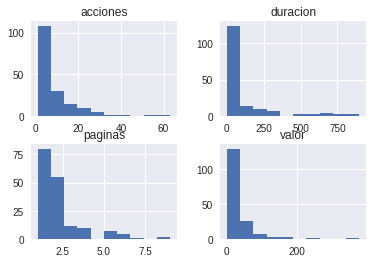

In [10]:
dataframe.drop(['clase'], 1).hist()

Tambien podemos combinar las entradas en pares para observar como se consentran linealmente las salidas de usuarios por colores:


*   Windows azul
*   Macintosh verde
* Linux rojo



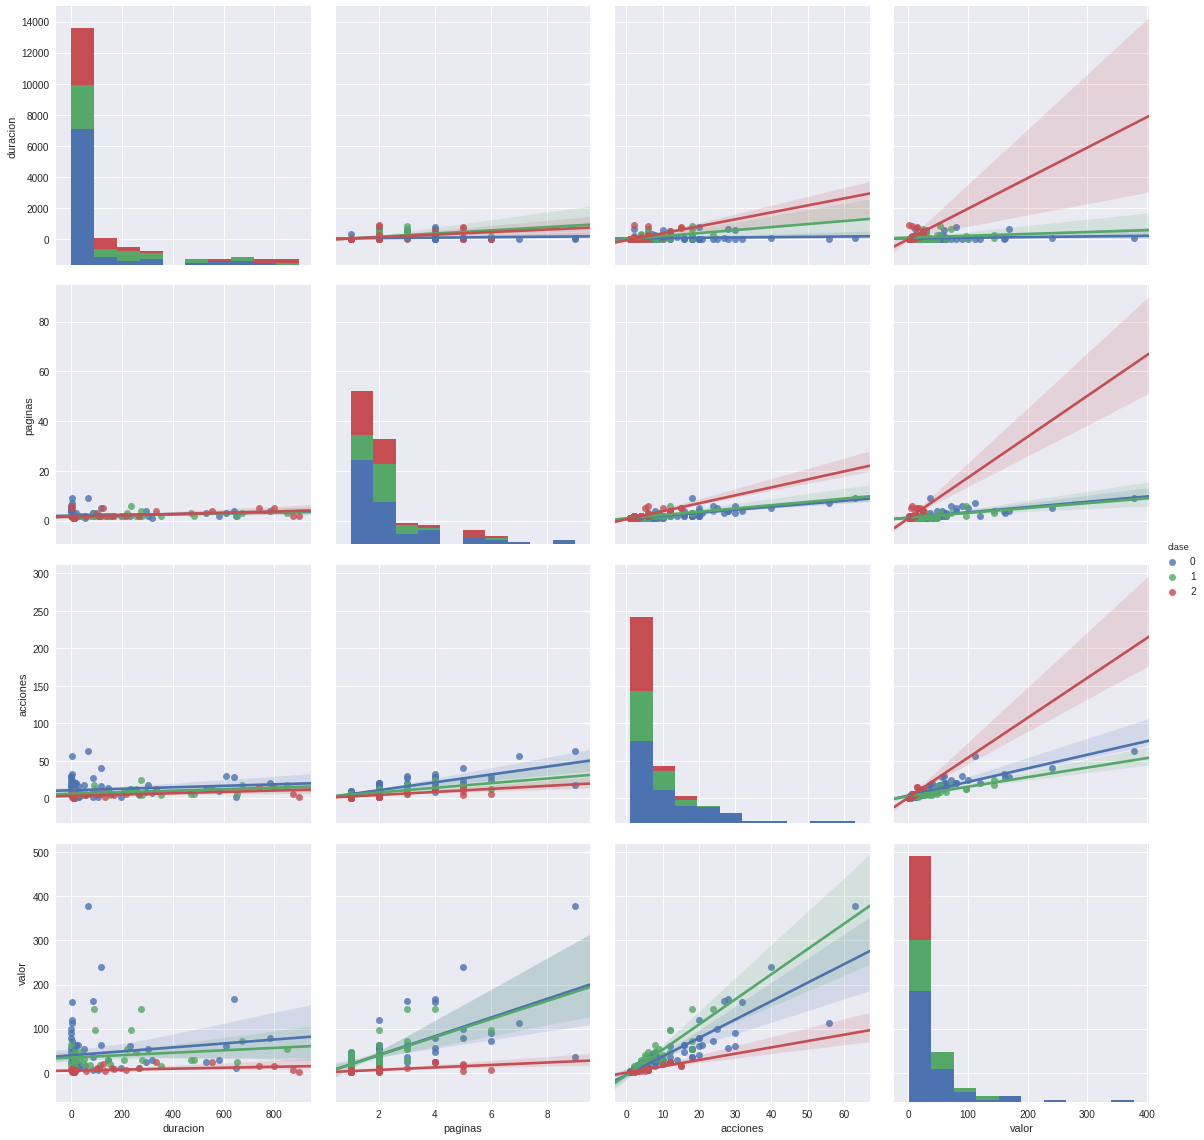

In [11]:
sb.pairplot(dataframe.dropna(), hue ='clase', size=4, vars=["duracion","paginas","acciones","valor"],kind='reg')

**Creacion del modelo de Regresión Logística**  
Carga,ps las variables de las 4 columnas de entrada en X excluyendo la columna "clase" con el metodo drop(). En cambio agregamos la columna "clase" en la variable y. Ejecutamos X.shape para comprobar la dimensión de nuestra matriz con datos de entra de 170 registros por 4 columnas.



In [12]:
X = np.array(dataframe.drop(['clase'],1))
y = np.array(dataframe['clase'])
X.shape

(170, 4)

In [13]:
model = linear_model.LogisticRegression()
model.fit(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [14]:
predictions = model.predict(X)
print(predictions)[0:5]

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 1 0 1 0 1 1 0 1 0 1 1 1 1 0 2 2
 2 2 2 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 1 0 1 0 0 2 0
 0 1 1 0 0 0 0 0 0 0 0 0 2 1 0 0 0 0 1 0 0 2 1 2 1 0 0 0 0 0 0 0 0 0 0 1 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0
 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


TypeError: ignored

In [15]:
model.score(X,y)

0.7764705882352941

**Validacion del modelo**  
Subdividir el conjunto de datos de entrada en un set de entrenamiento y otro para valida el modelo.

In [0]:
validation_size = 0.20
seed= 7
X_train, X_validation, y_train, y_validation = model_selection.train_test_split(X,y,test_size=validation_size,random_state =seed)

In [19]:
name ='Logistic Regression'
kfold = model_selection.KFold(n_splits=10,random_state=seed)
cv_results = model_selection.cross_val_score(model,X_train,y_train,cv=kfold, scoring='accuracy')
msg="%s: %f (%f)" %(name,cv_results.mean(),cv_results.std())
print(msg)

Logistic Regression: 0.743407 (0.115752)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

In [20]:
predictions = model.predict(X_validation)
print(accuracy_score(y_validation,predictions))

0.8529411764705882


**Reporte de resultado de modelo**  
Finalmente mostramos en pantalla la matriz de confusion donde se muestras cuantos resultados son equivocados de cada clase-

In [21]:
print(confusion_matrix(y_validation,predictions))

[[16  0  2]
 [ 3  3  0]
 [ 0  0 10]]


In [22]:
print(classification_report(y_validation,predictions))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86        18
           1       1.00      0.50      0.67         6
           2       0.83      1.00      0.91        10

   micro avg       0.85      0.85      0.85        34
   macro avg       0.89      0.80      0.81        34
weighted avg       0.87      0.85      0.84        34



In [23]:
X_new = pd.DataFrame({'duracion':[10],'paginas':[3],'acciones':[5],'valor':[9]})
model.predict(X_new)

array([2])